### Modulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Procesos

#### Carga de archivos

In [2]:
# Se importa el .csv a utilizar
cols = ['symbol',
        'name',
        'date',
        'ranknow',
        'open',
        'high',
        'low',
        'close',
        'volume',
        'market'	
]
df_crypto = pd.read_csv('https://drive.google.com/uc?export=download&id=1s41Nl05M-mzisjTf484yYgIhR4zHCVCU', usecols = cols )

#### Revision 

In [3]:
# Verificacion de duplicados
df_crypto.duplicated().sum()

0

In [4]:
# Verificacion de nulos
df_crypto.isnull().sum()

symbol     0
name       0
date       0
ranknow    0
open       0
high       0
low        0
close      0
volume     0
market     0
dtype: int64

In [5]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   symbol   942297 non-null  object 
 1   name     942297 non-null  object 
 2   date     942297 non-null  object 
 3   ranknow  942297 non-null  int64  
 4   open     942297 non-null  float64
 5   high     942297 non-null  float64
 6   low      942297 non-null  float64
 7   close    942297 non-null  float64
 8   volume   942297 non-null  float64
 9   market   942297 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 71.9+ MB


In [6]:
df_crypto['date'] = pd.to_datetime(df_crypto['date'])

df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   symbol   942297 non-null  object        
 1   name     942297 non-null  object        
 2   date     942297 non-null  datetime64[ns]
 3   ranknow  942297 non-null  int64         
 4   open     942297 non-null  float64       
 5   high     942297 non-null  float64       
 6   low      942297 non-null  float64       
 7   close    942297 non-null  float64       
 8   volume   942297 non-null  float64       
 9   market   942297 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 71.9+ MB


#### Graficos

#### Top 5 criptomonedas con mayor acumulacion de volumen de mercado
En este grafico podemos ver las 5 criptomonedas con mayor volumen de mercado o transaccional, lo que nos determina sobre que monedas sera coherente realizar el analisis.


<AxesSubplot:xlabel='name'>

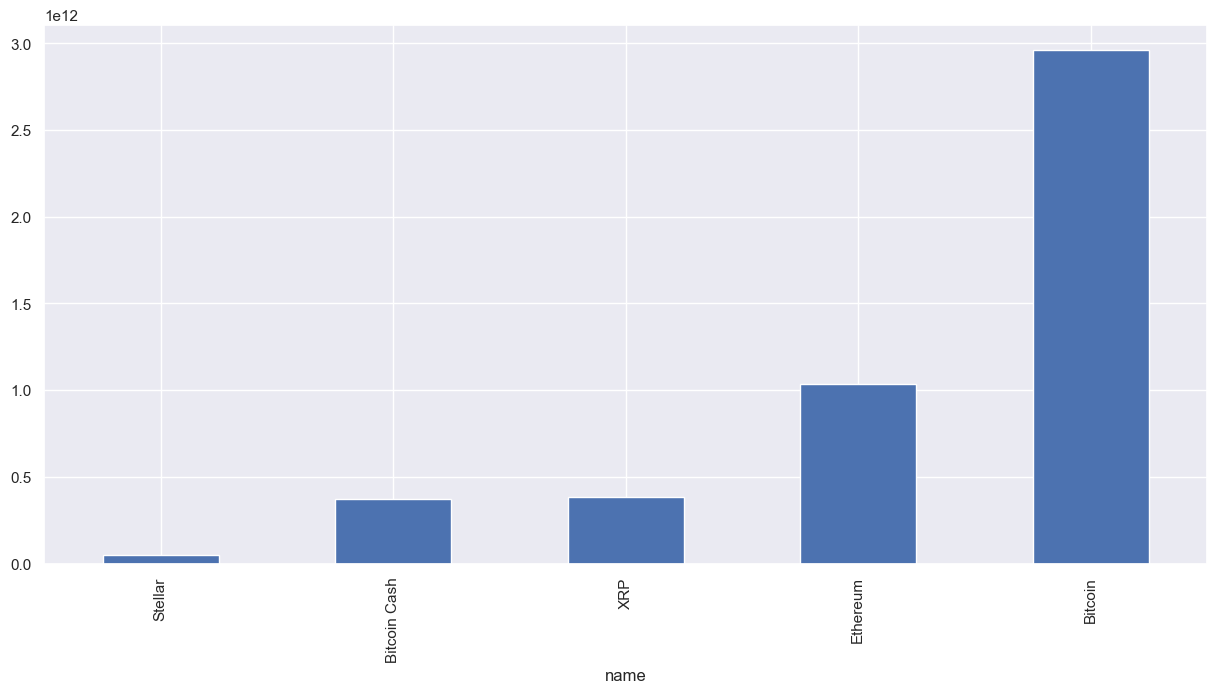

In [106]:
sns.set(rc = {'figure.figsize':(15,7)})

crypto_top5 = df_crypto[df_crypto['ranknow'].isin([1,2,3,4,5])]
crypto_top5

volume = crypto_top5.groupby(crypto_top5['name'])['volume'].sum()

fig, ax = plt.subplots(figsize = (15,7))
volume.sort_values().plot(kind = 'bar')

#### Evolucion del volumen de mercado
Este grafico nos sirve como referencia de crecimiento en el volumen de agentes dentro del mercado para luego llegar a ciertas concuciones en base a los crecimientos del mercado.

<AxesSubplot:xlabel='date'>

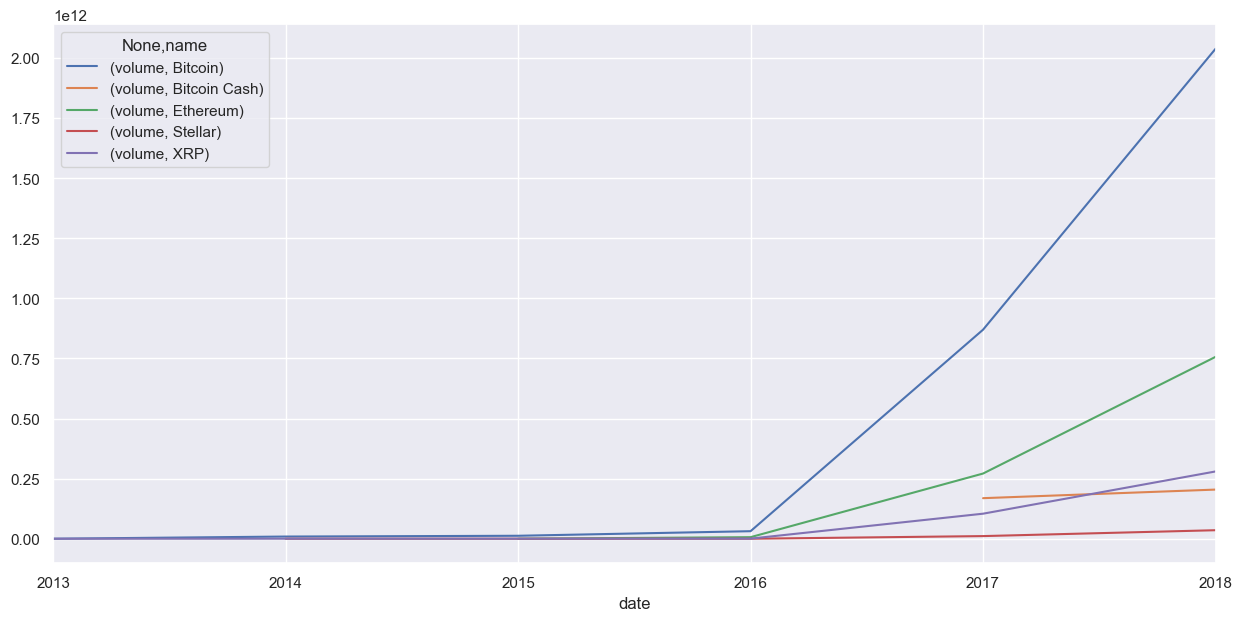

In [107]:
volume_year = pd.DataFrame(crypto_top5.groupby([pd.Grouper(key = 'date', freq = 'Y'), 'name'])['volume'].sum())
fig, ax = plt.subplots(figsize = (15,7))
volume_year.unstack().plot(legend= True, ax = ax)

#### Evolucion del precio
En este grafico podemos observar la evolucion del precio de cada moneda a lo largo del tiempo, llegando a encontrar vinculos entre los momentos de alza de precios con el crecimiento abrupto del volumen de mercado o trnsaccional

<AxesSubplot:xlabel='date'>

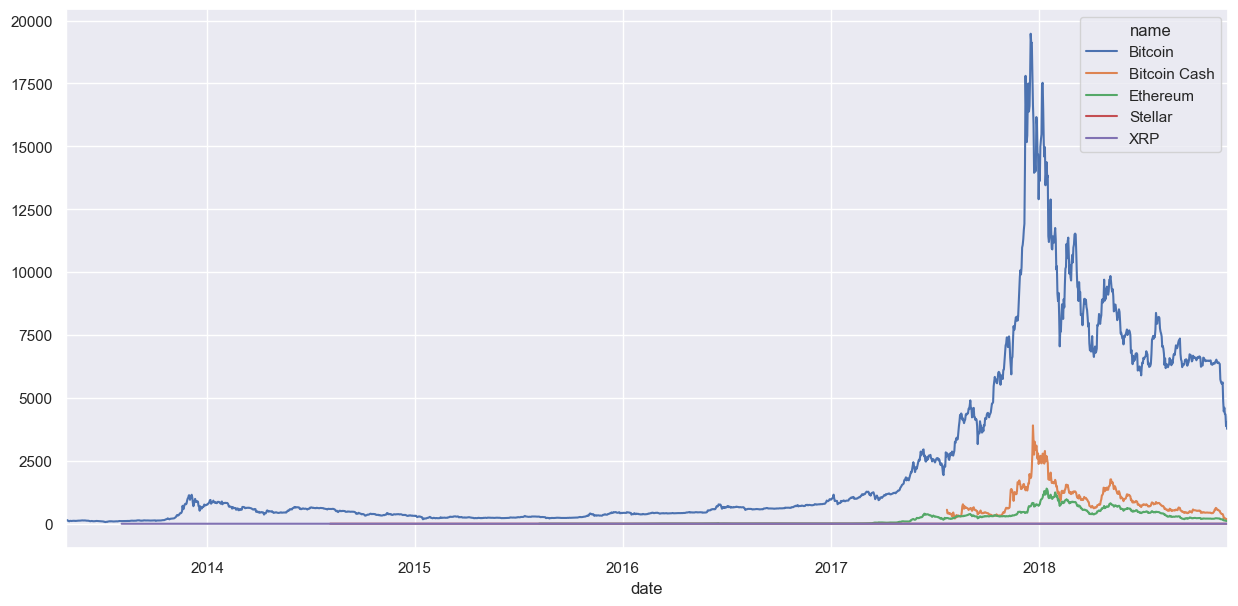

In [108]:
ap_precio = crypto_top5.groupby([pd.Grouper(key='date', freq='D'), 'name'])['open'].sum()
fig, ax = plt.subplots(figsize = (15,7))
ap_precio.unstack().plot(ax = ax)

#### Capitalizacion de mercado comparativa
En este grafico podemos llegar a apreciar la valoracion relativa sobre cada moneda en un grafico conjunto

<AxesSubplot:xlabel='date'>

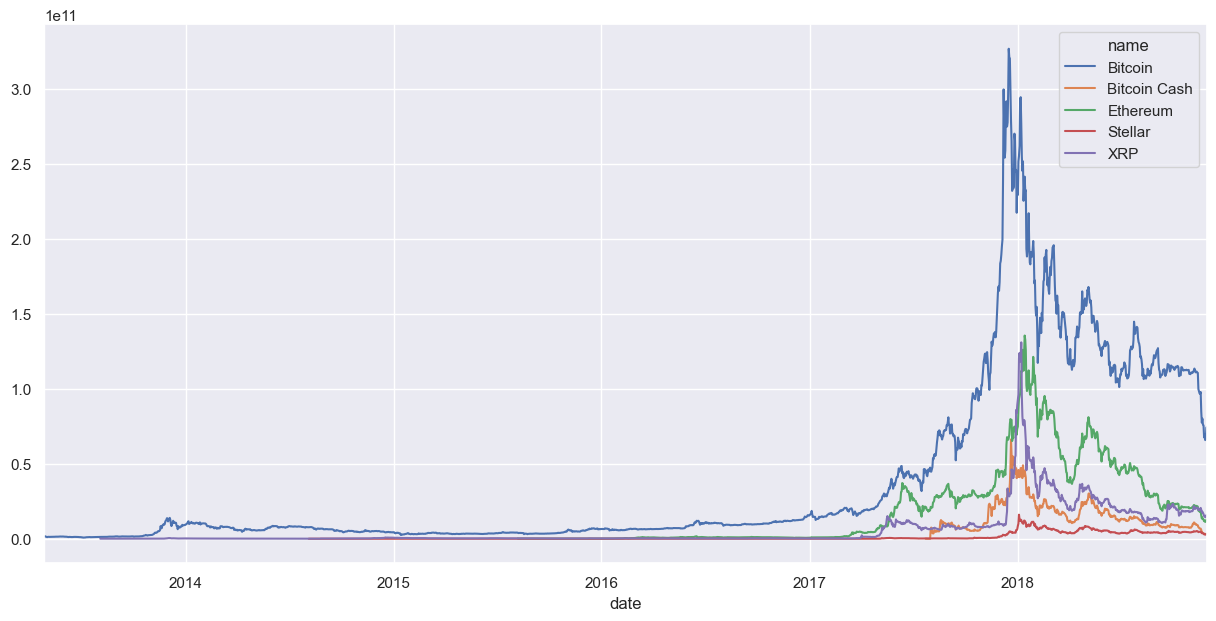

In [112]:
marketcap_year = crypto_top5.groupby([pd.Grouper(key='date', freq='D'), 'name'])['market'].sum()
fig, ax = plt.subplots(figsize = (15,7))
marketcap_year.unstack().plot(ax = ax)

#### Capitalizacion de mercado por criptomoneda
En este apartado podemos ver la evolucion y variaciones de la capitalizacion de mercado, que es un indice de disponibilidad. El mismo nos permite eveluar la demanda por moneda en determinados momentos del año en contraste a cieertos eventos y la evolucion de su propia demanda. 
Juento al historico de precios es posible ver la correlacion entre las monedas y como el precio de una puede llegar a afectar la demanda de otras (demanda cruzada) o estudiar sus elasticidades con respecto a su propio precio y contra el de otras monedas.

#### Capitalizacion de mercado del Bitcoin

<AxesSubplot:xlabel='date', ylabel='Bitcoin'>

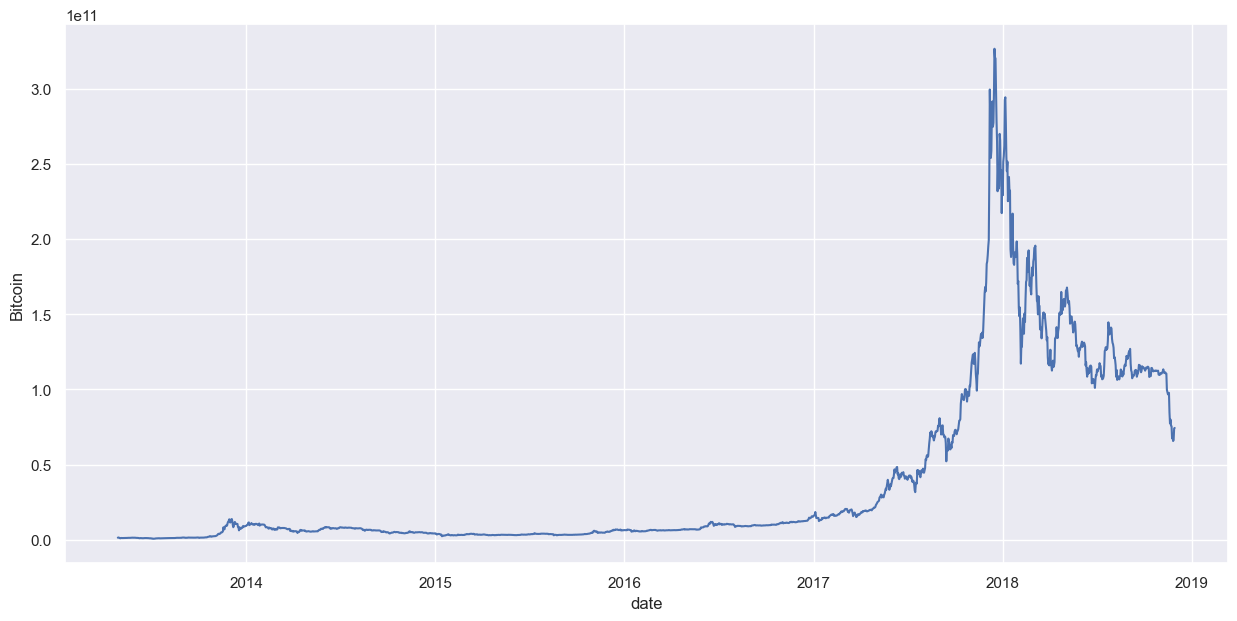

In [113]:
marketcap_btc = marketcap_year.unstack()['Bitcoin']
sns.lineplot(data = marketcap_btc)

#### Capitalizacion de mercado del Ethereum

<AxesSubplot:xlabel='date', ylabel='Ethereum'>

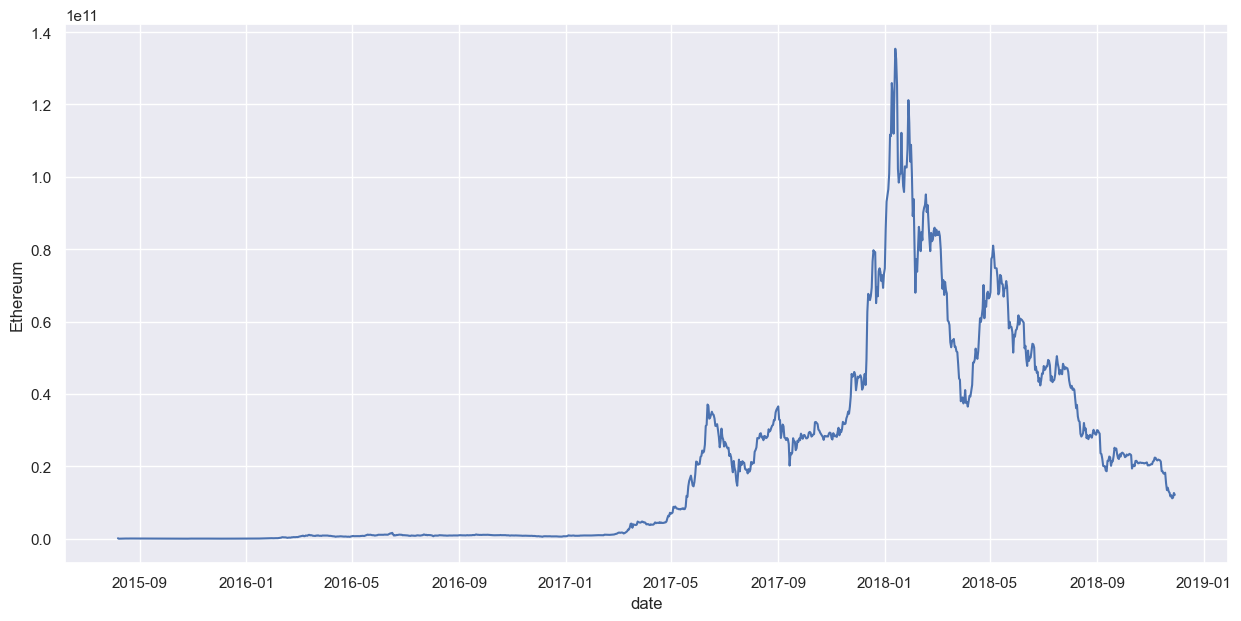

In [122]:
marketcap_eth = marketcap_year.unstack()['Ethereum']
sns.lineplot(data = marketcap_eth)

#### Capitalizacion de mercado del XRP

<AxesSubplot:xlabel='date', ylabel='XRP'>

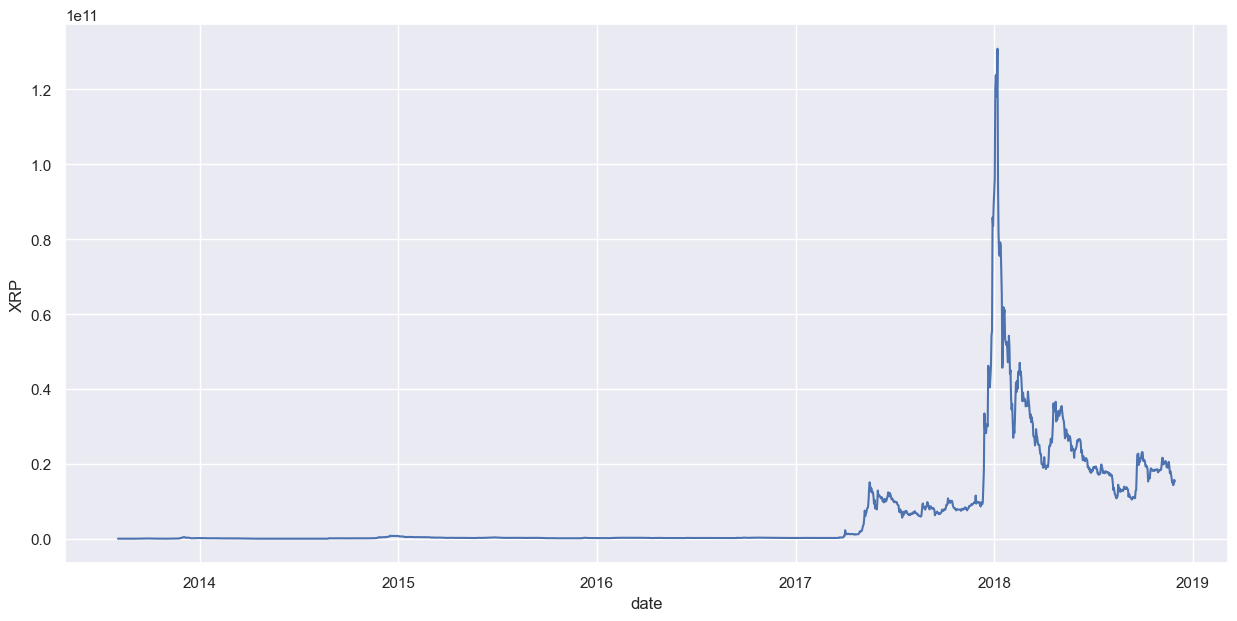

In [125]:
marketcap_xrp = marketcap_year.unstack()['XRP']
sns.lineplot(data = marketcap_xrp)

#### Capitalizacion de mercado del Bitcoin Cash

<AxesSubplot:xlabel='date', ylabel='Bitcoin Cash'>

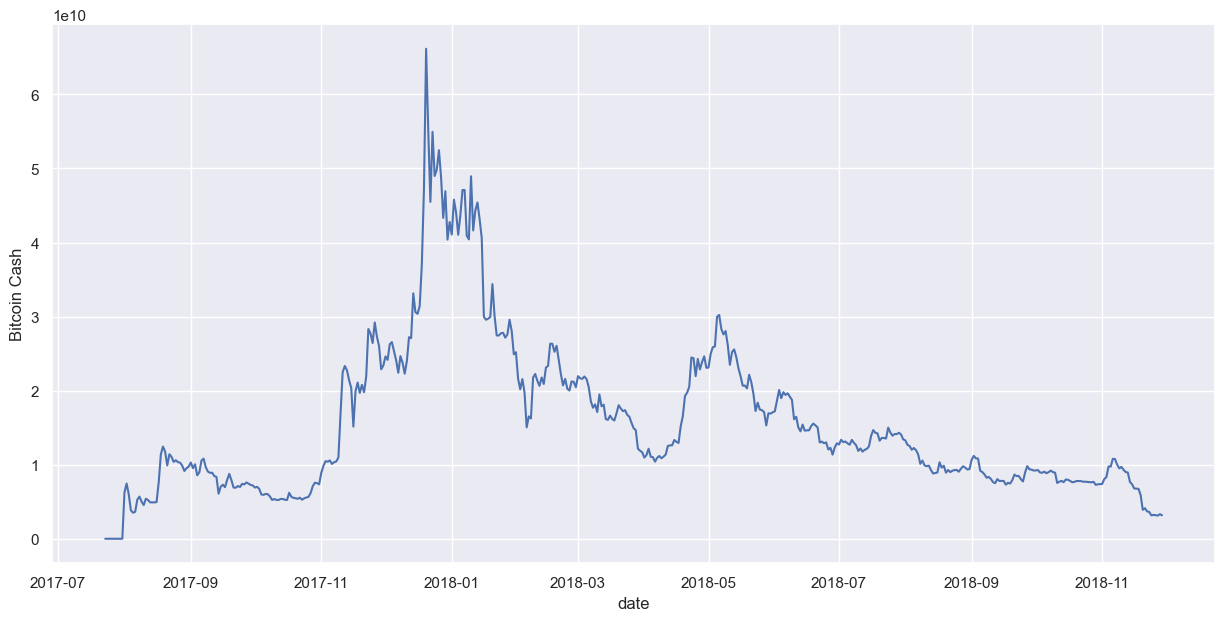

In [124]:
marketcap_bch = marketcap_year.unstack()['Bitcoin Cash']
sns.lineplot(data = marketcap_bch)

#### Capitalizacion de mercado del Stellar

<AxesSubplot:xlabel='date', ylabel='Stellar'>

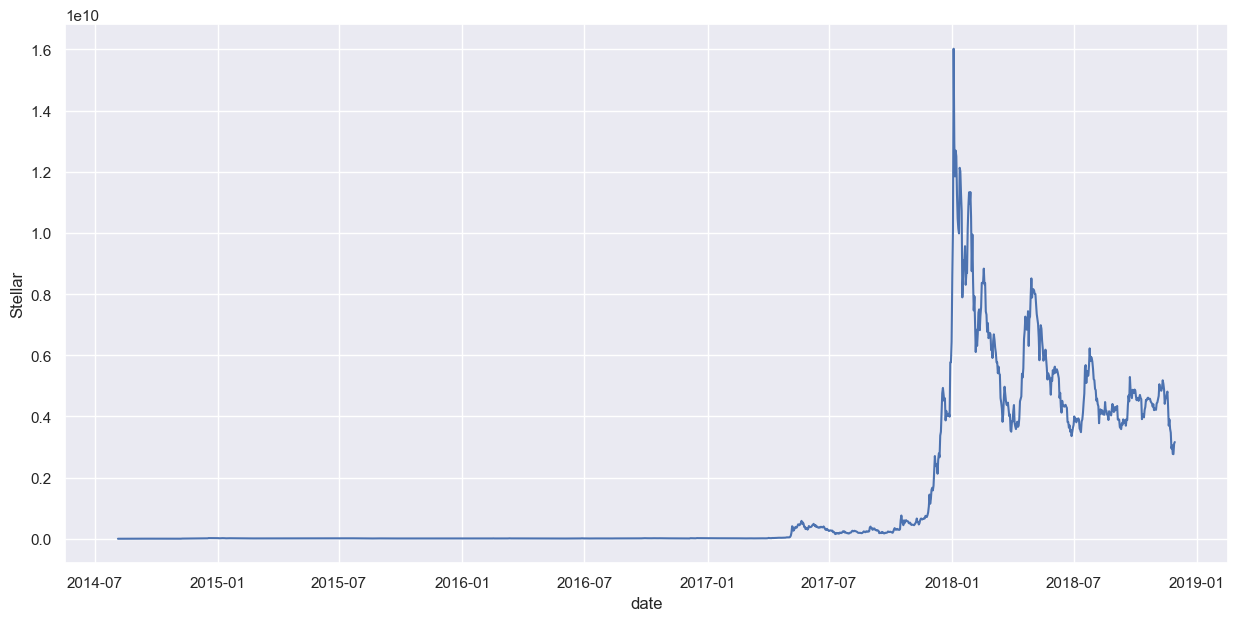

In [121]:
marketcap_xlm = marketcap_year.unstack()['Stellar']
sns.lineplot(data = marketcap_xlm)